Pyspark Installation

In [1]:
!pip install pyspark
!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 26 kB/s 
     |████████████████████████████████| 199 kB 62.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=64cd9ca4271ce6750831bf13a41cf4377e0e997766ecb07c6b0563f07c8de693
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing the necesaary Libraries

In [2]:
from pyspark import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import HashingTF, Tokenizer, StopWordsRemover
import pandas as pd
import matplotlib.pyplot as plt

Creating the Local Spark Session

In [21]:
spark_session = SparkSession.builder.master("local[1]").appName("temp").getOrCreate()

Uploading the CSV File

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Sentiment_Analysis_Dataset.csv to Sentiment_Analysis_Dataset.csv


In [6]:
Airline_df_SA=pd.read_csv('Sentiment_Analysis_Dataset.csv')
Airline_df_SA.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.700000e+17,negative,0.6578,Flight Booking Problems,0.6578,American,NaN,McKennon,NaN,0,@AmericanAir Thanks; but that results in missi...,NaN,2/23/2015 6:47,NaN,Atlantic Time (Canada)
1,5.680000e+17,negative,1.0000,Flight Booking Problems,0.3603,US Airways,NaN,jdpletnick,NaN,1,@USAirways charging $200 2 change a flight is ...,NaN,2/17/2015 11:43,Newtown; Pa,Quito
2,5.700000e+17,negative,1.0000,Flight Booking Problems,1.0000,United,NaN,ljtypes,NaN,0,@united tried to book a flight IAH-MNL departi...,NaN,2/22/2015 21:01,H-town,NaN
3,5.700000e+17,negative,1.0000,Lost Luggage,1.0000,United,NaN,szymanski_t,NaN,0,@United DO NOT FLY UNITED WITH CHECKED BAGGAGE...,NaN,2/22/2015 6:29,NaN,Eastern Time (US & Canada)
4,5.700000e+17,positive,0.6498,NaN,NaN,American,NaN,davidmacho,NaN,0,@AmericanAir Thank you so much.,NaN,2/23/2015 13:27,??T: 41.498967;2.186957,Madrid


Converted the Time stamp to a Simpler Date Form

In [12]:
Airline_df_SA['tweet_created'] = pd.to_datetime(Airline_df_SA['tweet_created']).dt.date

In [13]:
Airline_df_SA['tweet_created'] = pd.to_datetime(Airline_df_SA['tweet_created'])
Airline_df_SA.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.700000e+17,negative,0.6578,Flight Booking Problems,0.6578,American,NaN,McKennon,NaN,0,@AmericanAir Thanks; but that results in missi...,NaN,2015-02-23,NaN,Atlantic Time (Canada)
1,5.680000e+17,negative,1.0000,Flight Booking Problems,0.3603,US Airways,NaN,jdpletnick,NaN,1,@USAirways charging $200 2 change a flight is ...,NaN,2015-02-17,Newtown; Pa,Quito
2,5.700000e+17,negative,1.0000,Flight Booking Problems,1.0000,United,NaN,ljtypes,NaN,0,@united tried to book a flight IAH-MNL departi...,NaN,2015-02-22,H-town,NaN
3,5.700000e+17,negative,1.0000,Lost Luggage,1.0000,United,NaN,szymanski_t,NaN,0,@United DO NOT FLY UNITED WITH CHECKED BAGGAGE...,NaN,2015-02-22,NaN,Eastern Time (US & Canada)
4,5.700000e+17,positive,0.6498,NaN,NaN,American,NaN,davidmacho,NaN,0,@AmericanAir Thank you so much.,NaN,2015-02-23,??T: 41.498967;2.186957,Madrid


In [14]:
Airline_df_SA['tweet_created'].min()

Timestamp('2015-02-16 00:00:00')

Dropping the uncessary columns

In [15]:
del Airline_df_SA['tweet_coord']
del Airline_df_SA['airline_sentiment_gold']
del Airline_df_SA['negativereason_gold']
Airline_df_SA.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,5.700000e+17,negative,0.6578,Flight Booking Problems,0.6578,American,McKennon,0,@AmericanAir Thanks; but that results in missi...,2015-02-23,NaN,Atlantic Time (Canada)
1,5.680000e+17,negative,1.0000,Flight Booking Problems,0.3603,US Airways,jdpletnick,1,@USAirways charging $200 2 change a flight is ...,2015-02-17,Newtown; Pa,Quito


Determining all the Airlines for the study

In [16]:
Airline_df_SA['airline'].unique()

array(['American', 'US Airways', 'United', 'Southwest', 'Delta',
       'Virgin America'], dtype=object)

Plotting the Airlines as per the Positive and negative sentiment composition

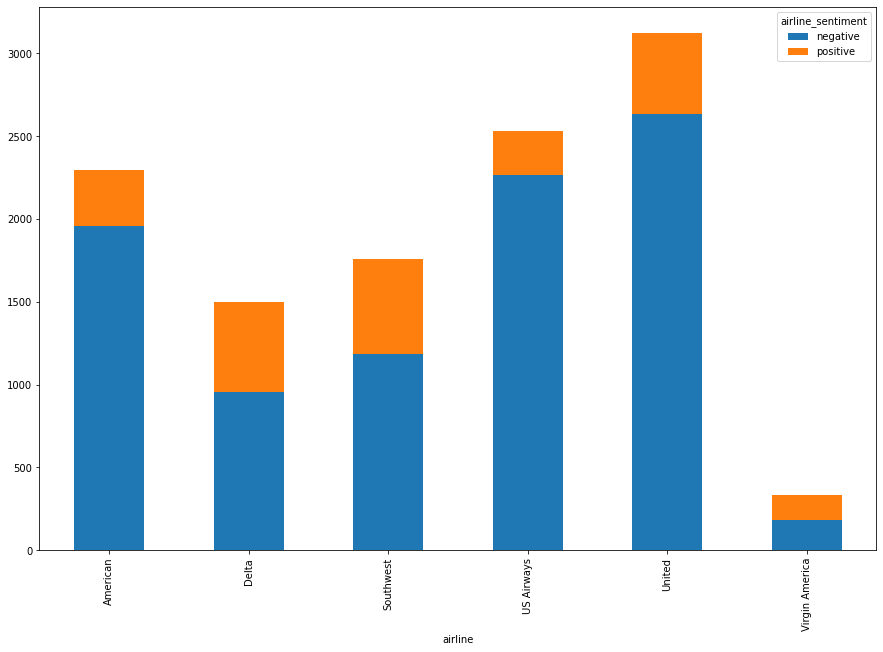

In [18]:
fig = Airline_df_SA.groupby(['airline', 'airline_sentiment']).size()
fig.unstack().plot(kind='bar', stacked=True, figsize=(15,10))

Plotting the Airlines as per the available negative reasons to understand how On-Time/Delay impacts the sentiment

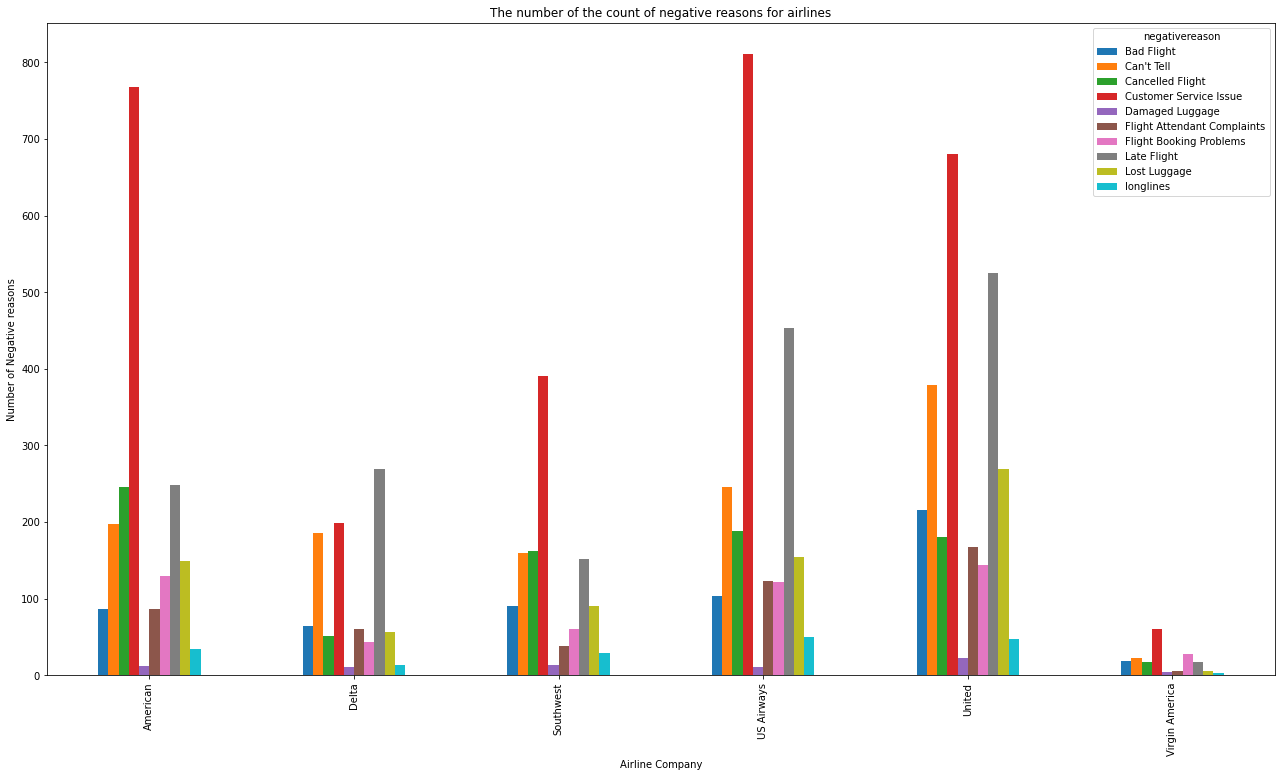

In [19]:
NR_df = Airline_df_SA.groupby('airline')['negativereason'].value_counts(ascending=True)
NR_df.groupby(['airline','negativereason']).sum().unstack().plot(kind='bar',figsize=(22,12))
plt.xlabel('Airline Company')
plt.ylabel('Number of Negative reasons')
plt.title("The number of the count of negative reasons for airlines")
plt.show()

Converting the CSV data to a Spark Dataframe

In [22]:
Airline_df_LR = spark_session.read.csv('Sentiment_Analysis_Dataset.csv',header = True) 

Selecting the Sentiment and the twitter data text. Also removing the NULL values

In [23]:
Airline_df_LR.show(truncate=False, n=3)
Airline_df_LR1 = Airline_df_LR.filter(col("airline_sentiment").isNotNull()).select("text", "airline_sentiment")

+--------+-----------------+----------------------------+-----------------------+-------------------------+----------+----------------------+----------+-------------------+-------------+------------------------------------------------------------------------------------------------------------------------------------------------+-----------+---------------+--------------+----------------------+
|tweet_id|airline_sentiment|airline_sentiment_confidence|negativereason         |negativereason_confidence|airline   |airline_sentiment_gold|name      |negativereason_gold|retweet_count|text                                                                                                                                            |tweet_coord|tweet_created  |tweet_location|user_timezone         |
+--------+-----------------+----------------------------+-----------------------+-------------------------+----------+----------------------+----------+-------------------+-------------+------------------

In [24]:
Airline_df_LR2 = Airline_df_LR1.select("text", "airline_sentiment")
Airline_df_LR2.show(truncate = False,n=5)

+------------------------------------------------------------------------------------------------------------------------------------------------+-----------------+
|text                                                                                                                                            |airline_sentiment|
+------------------------------------------------------------------------------------------------------------------------------------------------+-----------------+
|@AmericanAir Thanks; but that results in missing the conference I'm attending. Are there options to book earlier;or if not;receive a refund?    |negative         |
|@USAirways charging $200 2 change a flight is a rip off the reason I have 2 is out of my hands &amp; I want 2 reschedule same flight but in July|negative         |
|@united tried to book a flight IAH-MNL departing 3/31/15 returning 4/17/15 you are advertising 9 flights for $1051 that can't be book!          |negative         |
|@United D

Using the Regular expression, Replacing positive as 1, negative as 0 and neutral as -1

In [25]:
d1 = Airline_df_LR2.withColumn("airline_sentiment", regexp_replace(Airline_df_LR2["airline_sentiment"], "positive", "1"))
d1.show()


+--------------------+-----------------+
|                text|airline_sentiment|
+--------------------+-----------------+
|@AmericanAir Than...|         negative|
|@USAirways chargi...|         negative|
|@united tried to ...|         negative|
|@United DO NOT FL...|         negative|
|@AmericanAir Than...|                1|
|@united Nope - st...|         negative|
|@United I have no...|         negative|
|@SouthwestAir can...|         negative|
|@united Yes I did...|         negative|
|@SouthwestAir Thx...|                1|
|@USAirways I have...|         negative|
|@united space. Do...|         negative|
|@USAirways @Ameri...|         negative|
|@SouthwestAir you...|         negative|
|@JetBlue; my dads...|         negative|
|@JetBlue ...secon...|         negative|
|@United the ones ...|         negative|
|@AmericanAir Ther...|         negative|
|@USAirways now on...|         negative|
|@united nice 2 se...|         negative|
+--------------------+-----------------+
only showing top

In [26]:
d2 = d1.withColumn("airline_sentiment", regexp_replace(d1["airline_sentiment"], "negative", "0"))
d2.show()

+--------------------+-----------------+
|                text|airline_sentiment|
+--------------------+-----------------+
|@AmericanAir Than...|                0|
|@USAirways chargi...|                0|
|@united tried to ...|                0|
|@United DO NOT FL...|                0|
|@AmericanAir Than...|                1|
|@united Nope - st...|                0|
|@United I have no...|                0|
|@SouthwestAir can...|                0|
|@united Yes I did...|                0|
|@SouthwestAir Thx...|                1|
|@USAirways I have...|                0|
|@united space. Do...|                0|
|@USAirways @Ameri...|                0|
|@SouthwestAir you...|                0|
|@JetBlue; my dads...|                0|
|@JetBlue ...secon...|                0|
|@United the ones ...|                0|
|@AmericanAir Ther...|                0|
|@USAirways now on...|                0|
|@united nice 2 se...|                0|
+--------------------+-----------------+
only showing top

In [27]:
d3 = d2.withColumn("airline_sentiment", regexp_replace(d2["airline_sentiment"], "neutral", "-1"))
d3.show()

+--------------------+-----------------+
|                text|airline_sentiment|
+--------------------+-----------------+
|@AmericanAir Than...|                0|
|@USAirways chargi...|                0|
|@united tried to ...|                0|
|@United DO NOT FL...|                0|
|@AmericanAir Than...|                1|
|@united Nope - st...|                0|
|@United I have no...|                0|
|@SouthwestAir can...|                0|
|@united Yes I did...|                0|
|@SouthwestAir Thx...|                1|
|@USAirways I have...|                0|
|@united space. Do...|                0|
|@USAirways @Ameri...|                0|
|@SouthwestAir you...|                0|
|@JetBlue; my dads...|                0|
|@JetBlue ...secon...|                0|
|@United the ones ...|                0|
|@AmericanAir Ther...|                0|
|@USAirways now on...|                0|
|@united nice 2 se...|                0|
+--------------------+-----------------+
only showing top

Typecasting the sentiment column as integer and changing the name to Label

In [28]:
Airline_df_LR3 = d3.select(col("text").alias("SentimentText"), col("airline_sentiment").cast("Int").alias("label"))
Airline_df_LR3.show(truncate = False,n=5)

+------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|SentimentText                                                                                                                                   |label|
+------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|@AmericanAir Thanks; but that results in missing the conference I'm attending. Are there options to book earlier;or if not;receive a refund?    |0    |
|@USAirways charging $200 2 change a flight is a rip off the reason I have 2 is out of my hands &amp; I want 2 reschedule same flight but in July|0    |
|@united tried to book a flight IAH-MNL departing 3/31/15 returning 4/17/15 you are advertising 9 flights for $1051 that can't be book!          |0    |
|@United DO NOT FLY UNITED WITH CHECKED BAGGAGE! It will never find you!          

Removing Null Values from the Sentiment text column

In [29]:
Airline_df_LR4 =Airline_df_LR3 .filter(col("SentimentText").isNotNull()).select("SentimentText", "label")

Splitting the testing and training data with index 0 as training and 1 as testing. Counting the rows ocurring in the split

In [30]:
Split_Data = Airline_df_LR4.randomSplit([0.7, 0.3]) 
Train_Data = Split_Data[0] 
Test_Data = Split_Data[1] 
Train_count = Train_Data.count()
Test_count = Test_Data.count()
print ("Train rows:", Train_count, "; Test rows:", Test_count)

Train rows: 8039 ; Test rows: 3501


Tokenizing the Training Data

In [31]:
Token = Tokenizer(inputCol="SentimentText", outputCol="SentimentWords")
Token_Train = Token.transform(Train_Data)
print(Token_Train)
Token_Train.printSchema()
Token_Train.show(truncate=False, n=5)

DataFrame[SentimentText: string, label: int, SentimentWords: array<string>]
root
 |-- SentimentText: string (nullable = true)
 |-- label: integer (nullable = true)
 |-- SentimentWords: array (nullable = true)
 |    |-- element: string (containsNull = true)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|SentimentText                                                                                                                                                       |label|SentimentWords                                                                                                                                                                         |
+---------------------------

Removing the stop words for the Training Data

In [32]:
Stopwords = StopWordsRemover(inputCol=Token.getOutputCol(), outputCol="MeaningfulWords")
Stopwords_Train = Stopwords.transform(Token_Train)
Stopwords_Train.show(truncate=False, n=5)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------+
|SentimentText                                                                                                                                                       |label|SentimentWords                                                                                                                                                                         |MeaningfulWords                                                                                                                       

Appying Hashing Transformation to obtain vectors for our prediction

In [33]:
HashingTF = HashingTF(inputCol=Stopwords.getOutputCol(), outputCol="features")
HashingTF_Train = HashingTF.transform(Stopwords_Train).select('label', 'MeaningfulWords', 'features')
HashingTF_Train.show(truncate=False, n=3)

+-----+--------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------+
|label|MeaningfulWords                                                                                                     |features                                                                                                                                             |
+-----+--------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------+
|1    |["""lol, guys, it"", -, me;, 4, months, ago...???@jetblue:, fleet's, fleek., http://t.co/lycarltfhl??\9d"]          |(262144,[1546,2040,27412,29473,38640,63362,77276,10

Training our Logistic Regression Model

In [34]:
LogisticRegression_SA= LogisticRegression(labelCol="label", featuresCol="features", maxIter=10, regParam=0.01)
model = LogisticRegression_SA.fit(HashingTF_Train)

Performing the same step of data manipulation on the test data.

In [35]:
Token_Test = Token.transform(Test_Data)
Stopwords_Test = Stopwords.transform(Token_Test)
HashingTF_Test = HashingTF.transform(Stopwords_Test).select('Label', 'MeaningfulWords', 'features')
HashingTF_Test.show(truncate=False, n=2)

+-----+-----------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Label|MeaningfulWords                                                                                                                    |features                                                                                                                                                               |
+-----+-----------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|0    |[".@jetblue, ooookay, @abc, silly, you., guess, ""watching"", oscars,

Using our Logistic Regression Model to make the Final Prediction on the Test Data

In [38]:
Logisticreg_Pred = model.transform(HashingTF_Test)
Prediction = Logisticreg_Pred.select("MeaningfulWords", "prediction", "Label")
Prediction.show(n=4, truncate = False)
Correct = Prediction.filter(Prediction['prediction'] == Prediction['Label']).count()
Total = Prediction.count()

+-----------------------------------------------------------------------------------------------------------------------------------+----------+-----+
|MeaningfulWords                                                                                                                    |prediction|Label|
+-----------------------------------------------------------------------------------------------------------------------------------+----------+-----+
|[".@jetblue, ooookay, @abc, silly, you., guess, ""watching"", oscars, purely, twitter, reactions, tonight., #oscars"]              |0.0       |0    |
|["???@americanair:, , ""jason;, end, missing, connection., please, see, dfw, agents, assistance.??\9d, nope!, taken, yet;, still!"]|0.0       |0    |
|["@americanair, ""overweight"", flight, =, sold, tickets, seats., know, that., call, is."]                                         |0.0       |0    |
|["@americanair, ""sorry, disappointed"", #outoftouchwithreality, #people, kids, jobs"]       

Displaying the Final Accuracy of our Logistic Regression Prediction Model

In [37]:
print("Correct prediction using Model:", Correct, ", Total:", Total, ", accuracy:", Correct/Total)

Correct prediction using Model: 3168 , Total: 3501 , accuracy: 0.9048843187660668


-END OF CODE-